In [1]:
import earthnet as en
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [29]:
VariancePerTile_DF = pd.DataFrame(columns=['TileName','Mean','Variance'])
EmptyList =[]

for dirname1 in os.listdir(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\TileDFs"):
    string1 = os.path.basename(dirname1)

    df1 = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\TileDFs\\" + string1)
    df1.set_index(df1['Location'],inplace=True)
    df1['sample_mean'] = df1.mean(axis=1, numeric_only=True, skipna=True)
    df1['sample_std'] = df1.std(axis=1, numeric_only=True, skipna=True)

    VariancePerTile_DF.loc[len(VariancePerTile_DF)] = [string1[0:5],df1['sample_mean'].mean(),df1['sample_std'].mean()]
    EmptyList.append(VariancePerTile_DF)

FinalDF = pd.concat(EmptyList)

Scores = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\TileScore")
FinalDF['ENS Tile'] = Scores['EarthNet Score']

Output = r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\TilesMeanVarScore.csv"
FinalDF.to_csv(Output)

In [49]:
FinalDF

,TileName,Mean,Variance,ENS Tile
0,29SND,0.093162,0.044982,0.340795
1,29SPC,0.088185,0.042622,0.332422
2,29SQB,0.077053,0.030534,0.348964
3,29TNE,0.094741,0.049015,0.337786
4,29TPE,0.082844,0.042041,0.296357
...,...,...,...,...
77,34TFN,0.101705,0.059060,0.307024
78,34TFP,0.079152,0.034265,0.355789
79,34TFT,0.098798,0.048726,0.334221
80,34VCL,0.096319,0.049685,0.339920


In [58]:
SDF = (FinalDF[FinalDF['TileName'].str[2:3] == 'S']).drop_duplicates()
TDF = (FinalDF[FinalDF['TileName'].str[2:3] == 'T']).drop_duplicates()
UDF = (FinalDF[FinalDF['TileName'].str[2:3] == 'U']).drop_duplicates()
VDF = (FinalDF[FinalDF['TileName'].str[2:3] == 'V']).drop_duplicates()

Variance = [SDF['Variance'].mean(),TDF['Variance'].mean(),UDF['Variance'].mean(),VDF['Variance'].mean()]
ENS = [SDF['ENS Tile'].mean(),TDF['ENS Tile'].mean(),UDF['ENS Tile'].mean(),VDF['ENS Tile'].mean()]

In [48]:
df1

,5,10,15,20,25,30,35,40,45,50,...,70,75,80,85,90,95,100,Location,sample_mean,sample_std
Location,,,,,,,,,,,,,,,,,,,,,
target_34VFQ_2018-04-12_2018-09-08_1849_1977_4281_4409_28_108_66_146.npz,0.12500,0.12500,0.12500,0.06640,0.16740,0.17570,0.12500,0.06256,0.1451,0.06330,...,0.06250,0.23300,0.12500,0.06250,0.08746,0.06250,0.06250,target_34VFQ_2018-04-12_2018-09-08_1849_1977_4...,0.103706,0.047978
target_34VFQ_2018-04-12_2018-09-08_2361_2489_569_697_36_116_8_88.npz,0.12500,0.06280,0.18320,0.06287,0.06400,0.15310,0.12500,0.06366,0.0641,0.06250,...,0.13610,0.25000,0.12040,0.08826,0.06250,0.06250,0.06250,target_34VFQ_2018-04-12_2018-09-08_2361_2489_5...,0.102650,0.049912
target_34VFQ_2018-04-22_2018-09-18_2489_2617_569_697_38_118_8_88.npz,0.12590,0.06256,0.06280,0.12500,0.08010,0.06300,0.06354,0.06250,0.1250,0.07263,...,0.08870,0.08746,0.06525,0.06250,0.06250,0.12500,0.06250,target_34VFQ_2018-04-22_2018-09-18_2489_2617_5...,0.102012,0.055977
target_34VFQ_2018-04-22_2018-09-18_2617_2745_2233_2361_40_120_34_114.npz,0.25000,0.08830,0.12500,0.12500,0.11750,0.07510,0.13500,0.06250,0.1250,0.07580,...,0.06525,0.06320,0.06250,0.06015,0.06260,0.15650,0.07684,target_34VFQ_2018-04-22_2018-09-18_2617_2745_2...,0.105467,0.049290
target_34VFQ_2018-04-22_2018-09-18_3129_3257_1209_1337_48_128_18_98.npz,0.25000,0.06820,0.06250,0.17270,0.08496,0.07117,0.07367,0.06250,0.1191,0.07060,...,0.12500,0.07170,0.06250,0.06250,0.06555,0.12500,0.06250,target_34VFQ_2018-04-22_2018-09-18_3129_3257_1...,0.093311,0.047057
target_34VFQ_2018-05-02_2018-09-28_1081_1209_953_1081_16_96_14_94.npz,0.06400,0.12500,0.12067,0.10600,0.12500,0.10660,0.12500,0.08307,0.1250,0.25000,...,0.11160,0.06850,0.06635,0.09357,0.06433,0.12500,0.11346,target_34VFQ_2018-05-02_2018-09-28_1081_1209_9...,0.115602,0.044726
target_34VFQ_2018-05-02_2018-09-28_1849_1977_2489_2617_28_108_38_118.npz,0.08210,0.12500,0.12500,0.08215,0.25000,0.08905,0.12950,0.06830,0.2062,0.25000,...,0.08167,0.06250,0.06300,0.12500,0.06250,0.12500,0.06260,target_34VFQ_2018-05-02_2018-09-28_1849_1977_2...,0.118328,0.065489
target_34VFQ_2018-05-02_2018-09-28_2617_2745_1849_1977_40_120_28_108.npz,0.12500,0.12500,0.09515,0.06950,0.07025,0.06370,0.15140,0.06370,0.0663,0.12770,...,0.06330,0.06250,0.06250,0.15150,0.06250,0.20080,0.07260,target_34VFQ_2018-05-02_2018-09-28_2617_2745_1...,0.099639,0.052973
target_34VFQ_2018-05-02_2018-09-28_3129_3257_953_1081_48_128_14_94.npz,0.06450,0.12500,0.10250,0.07196,0.07630,0.12500,0.14660,0.06256,0.0631,0.25000,...,0.06250,0.06274,0.07480,0.17650,0.06250,0.12500,0.06354,target_34VFQ_2018-05-02_2018-09-28_3129_3257_9...,0.100990,0.051520


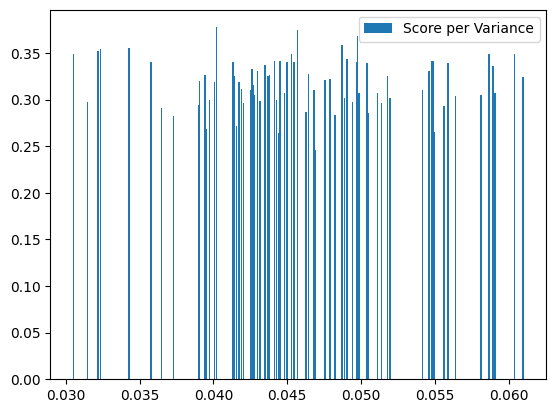

In [47]:
plt.bar(FinalDF['Variance'],FinalDF['ENS Tile'], label='Score per Variance', width=0.0001)

plt.legend()
plt.show()

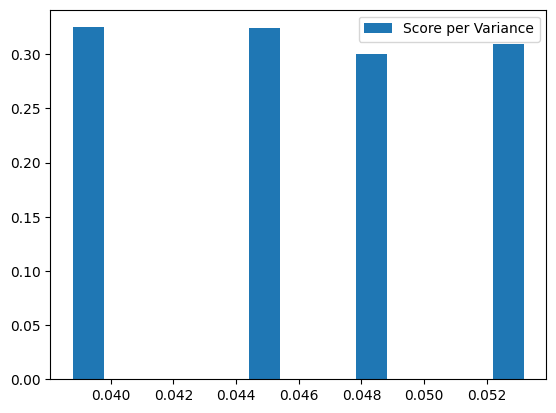

In [60]:
plt.bar(Variance,ENS, label='Score per Variance', width=0.001)

plt.legend()
plt.show()